# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# **MENGHUBUNGKAN DENGAN GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [3]:
path = "/content/grive/MyDrive/1.KULIAH/Semester 7/Machine Learning/praktikum07"

# **LOAD DATASET**

In [4]:
#Membaca dataset
df = pd.read_csv(path + "/data/dataset_satelit.csv")
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


# **PREPARATION DATA**

In [7]:
#Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [6]:
#Statistika Ringkas
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [8]:
# Cek Missing Value
print(df.isnull().sum())

No           0
Longitude    0
Lattitude    0
N            0
P            0
K            1
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
b12          0
b11          0
b9           0
b8a          0
b8           0
b7           0
b6           0
b5           0
b4           0
b3           0
b2           0
b1           0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
beta0_vv     0
beta0_vh     0
dtype: int64


In [9]:
df.columns

Index(['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'],
      dtype='object')

In [10]:
# Mengubah kolom MG ke numerik
df['Mg'] = pd.to_numeric(df['Mg'], errors='coerce')
df = df.dropna()

# **PEMBAGIAN DATASET**

In [11]:
#Menentukan variable X dan Dependen y
X = df[['P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']]
y = df['N']

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (592, 30)
Shape y: (592,)


In [12]:
#Membagi data Training dan Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (473, 30)
Testing data: (119, 30)


# **MODELLING**

In [13]:
# Membuat Model Prediksi

# Inisialisasi dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# **EVALUASI MODEL**

In [14]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.7549955124484078
RMSE: 0.19392193397227142


# **VISUALISASI**

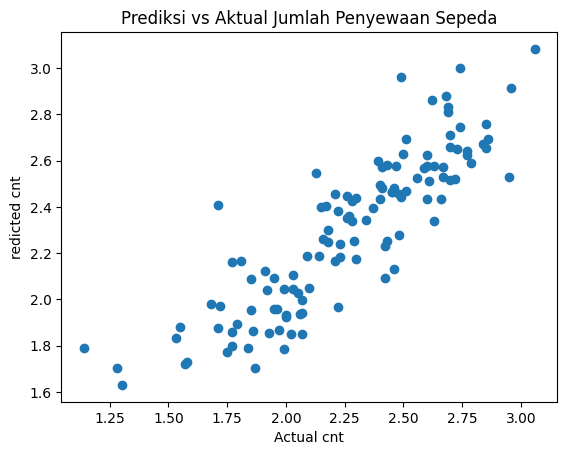

In [15]:
# visualisasi Model
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual cnt")
plt.ylabel("redicted cnt")
plt.title("Prediksi vs Aktual Jumlah Penyewaan Sepeda")
plt.show()